In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(21881, 28)
(21881, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [7]:
X_relative_footsteps_acc[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [8]:
## Entries where FL is swinging
idxs = np.where(X_relative_footsteps_acc[:, 21] == 1)[0]
X_relative_footsteps_acc_FL_swinging = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_FL_swinging = Y_relative_footsteps_acc[idxs]

## Predict FL foot -> x

In [9]:
X_relative_footsteps_acc_FL_swinging.shape

(10856, 28)

In [10]:
#X_relative_footsteps_acc_FL_swinging[:10, :]

In [11]:
Y_relative_footsteps_acc_FL_swinging[0, :]

array([ 0.22800851,  0.17177425,  0.23270544, -0.17693889, -0.24620022,
        0.1547656 , -0.24999362, -0.16156544])

### Linear Regression

In [40]:
# Input
X = np.hstack((X_relative_footsteps_acc_FL_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FL_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FL_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_relative_support_x = LinearRegression()

# Fit the model
model_fl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8608029411615994
RMSE:  0.010096164579357705
The lowest error is:  1.0166251604437626e-06
The highest error is:  0.0775909537350182
The avg. error is:  0.005490811439313479


In [41]:
model_fl_relative_support_x.coef_

array([[-0.01178144, -0.00534702,  0.01460952,  0.10401622,  0.00208394,
        -0.01346142,  0.35244999,  0.10079921, -0.07710348, -0.16856468,
         0.21052916,  0.27330024, -0.13317961, -0.16784818]])

In [42]:
model_fl_relative_support_x.intercept_

array([0.06572326])

Text(0, 0.5, 'Predictions')

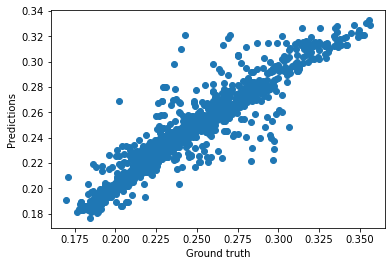

In [43]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [44]:
#%store model_fl_relative_support_x

In [45]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [46]:
# Save model
#joblib.dump(model_fl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_x.sav")

### Predict FL foot -> y

In [52]:
# Input
X = np.hstack((X_relative_footsteps_acc_FL_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FL_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FL_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_relative_support_y = LinearRegression()

# Fit the model
model_fl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8114509769653788
RMSE:  0.010073462268363656
The lowest error is:  5.69322139709616e-08
The highest error is:  0.05511380131443769
The avg. error is:  0.00638975734823986


In [53]:
model_fl_relative_support_y.coef_

array([[ 0.04722359, -0.01464848, -0.00189272, -0.00111866,  0.10014873,
         0.17202128, -0.1259219 ,  0.50207948,  0.07745918,  0.31336857,
        -0.63863279, -0.04369082, -0.05773615, -0.04624108]])

In [54]:
model_fl_relative_support_y.intercept_

array([-0.02708169])

Text(0, 0.5, 'Predictions')

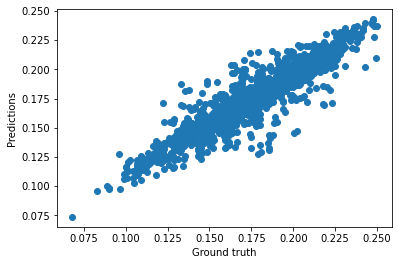

In [55]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [56]:
#%store model_fl_relative_support_y

In [43]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [44]:
# Save model
#joblib.dump(model_fl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_y.sav")